월별로 상대팀 생각x

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [3]:
t_bat16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv",encoding='utf-8',engine='python')
t_bat17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv",encoding='utf-8',engine='python')
t_bat18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')

In [4]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

## 2. 1타(안타-2타-3타-홈런) 변수 만들기

In [5]:
t_bat16['H1']=t_bat16['HIT']-t_bat16['H2']-t_bat16['H3']-t_bat16['HR']
t_bat17['H1']=t_bat17['HIT']-t_bat17['H2']-t_bat17['H3']-t_bat17['HR']
t_bat18['H1']=t_bat18['HIT']-t_bat18['H2']-t_bat18['H3']-t_bat18['HR']
t_bat19['H1']=t_bat19['HIT']-t_bat19['H2']-t_bat19['H3']-t_bat19['HR']

## 3. 월 정보 추가

In [6]:
#월 정보 추가
t_bat16['MONTH']=t_bat16['GDAY_DS'].astype(str).str[4:6]
t_bat17['MONTH']=t_bat17['GDAY_DS'].astype(str).str[4:6]
t_bat18['MONTH']=t_bat18['GDAY_DS'].astype(str).str[4:6]
t_bat19['MONTH']=t_bat19['GDAY_DS'].astype(str).str[4:6]

In [7]:
stats=['PA','AB','RBI','RUN','HIT','H1','H2','H3','HR','SB','CS','SH','SF','BB','IB','HP'
       ,'KK','GD','ERR','LOB','P_HRA_RT','P_AB_CN','P_HIT_CN']

## 4. 직전 기록(1,2,3년 전) 만들기_16,17,18년도

In [8]:
#팀별 기록(16년도)
data16=t_bat16.filter(['T_ID','MONTH']+stats)
t16=data16.groupby(['T_ID','MONTH']).sum()
t16['HIT_RATE']=t16['HIT']/t16['AB'] #타율 계산
t16=t16.add_prefix('16_') #각 변수명 앞에 연도 붙이기

#팀별 기록(17년도)
data17=t_bat17.filter(['T_ID','MONTH']+stats)
t17=data17.groupby(['T_ID','MONTH']).sum()
t17['HIT_RATE']=t17['HIT']/t17['AB']
t17=t17.add_prefix('17_') #각 변수명 앞에 연도 붙이기

#팀별 기록(18년도)
data18=t_bat18.filter(['T_ID','MONTH']+stats)
t18=data18.groupby(['T_ID','MONTH']).sum()
t18['HIT_RATE']=t18['HIT']/t18['AB']
t18=t18.add_prefix('18_') #각 변수명 앞에 연도 붙이기

## 5. 내년 기록 만들기(정답 셋 만들기 위함) > AB, HIT, HIT_RATE

In [9]:
#팀별 기록(19년도)
data19=t_bat19.filter(['T_ID','MONTH','AB','HIT'])
t19=data19.groupby(['T_ID','MONTH']).sum()
t19['HIT_RATE']=t19['HIT']/t19['AB']
t19=t19.add_prefix('19_')
t19.head()

19_AB  19_HIT  19_HIT_RATE
T_ID MONTH                            
HH   03       276      82     0.297101
     04       699     176     0.251788
     05       907     219     0.241455
     06       815     202     0.247853
     07       655     166     0.253435

## 6. 학습시킬 데이터 셋 만들기

In [10]:
#팀, 상대팀, 월 을 기분으로 데이터 합치기
a=pd.merge(t16,t17,on=['T_ID','MONTH'])
b=pd.merge(a,t18,on=['T_ID','MONTH'])
data=pd.merge(b,t19,on=['T_ID','MONTH'])

In [11]:
data=data.reset_index(level=['MONTH']) #MONTH열을 index에서 값으로 변환
data=data.astype({'MONTH':'int'}) #MONTH 값 형식을 숫자로 변환

In [12]:
data

,MONTH,16_PA,16_AB,16_RBI,16_RUN,16_HIT,16_H1,16_H2,16_H3,16_HR,16_SB,16_CS,16_SH,16_SF,16_BB,16_IB,16_HP,16_KK,16_GD,16_ERR,16_LOB,16_P_HRA_RT,16_P_AB_CN,16_P_HIT_CN,16_HIT_RATE,17_PA,17_AB,17_RBI,17_RUN,17_HIT,17_H1,17_H2,17_H3,17_HR,17_SB,17_CS,17_SH,17_SF,17_BB,17_IB,17_HP,17_KK,17_GD,17_ERR,17_LOB,17_P_HRA_RT,17_P_AB_CN,17_P_HIT_CN,17_HIT_RATE,18_PA,18_AB,18_RBI,18_RUN,18_HIT,18_H1,18_H2,18_H3,18_HR,18_SB,18_CS,18_SH,18_SF,18_BB,18_IB,18_HP,18_KK,18_GD,18_ERR,18_LOB,18_P_HRA_RT,18_P_AB_CN,18_P_HIT_CN,18_HIT_RATE,19_AB,19_HIT,19_HIT_RATE
T_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HH,4,912,797,82,88,210,158,36,2,14,8,5,20,4,76,5,15,181,22,24,189,5.615729,206,50,0.263488,987,889,102,108,245,183,42,5,15,10,6,14,5,66,2,13,181,20,21,194,6.063016,226,62,0.275591,845,753,107,119,210,150,39,2,19,15,10,2,8,67,4,15,168,14,16,150,5.503968,199,57,0.278884,699,176,0.251788
HH,5,1010,879,144,150,254,176,47,4,27,17,5,12,5,102,5,12,170,21,16,194,6.910250,244,70,0.288965,1005,879,117,126,257,193,41,2,21,15,8,18,4,78,3,25,173,16,7,216,7.053419,245,69,0.292378,949,853,101,115,231,166,37,4,24,11,9,6,7,70,2,13,168,29,11,173,6.105510,223,58,0.270809,907,219,0.241455
HH,6,965,860,120,120,245,175,35,5,30,12,10,11,7,73,3,14,183,19,14,188,6.669658,224,62,0.284884,1005,882,150,159,271,179,50,5,37,12,10,16,12,76,2,19,148,25,13,179,8.402152,223,76,0.307256,999,891,129,140,239,156,50,3,30,36,13,5,5,83,2,15,213,15,11,179,6.659854,247,67,0.268238,815,202,0.247853
HH,7,877,750,151,155,231,155,43,9,24,11,8,10,10,96,0,11,120,20,10,155,6.930201,217,76,0.308000,761,692,94,103,200,131,39,0,30,11,6,9,3,51,1,5,129,20,13,130,6.185134,166,51,0.289017,857,779,95,105,224,163,44,2,15,21,7,5,4,57,4,12,194,18,12,161,7.136018,224,74,0.287548,655,166,0.253435
HH,8,962,866,140,153,260,196,38,5,21,12,4,9,4,71,0,12,159,22,18,173,7.411688,257,85,0.300231,896,790,113,123,235,166,45,2,22,11,8,14,7,69,3,16,146,15,10,167,5.597948,218,64,0.297468,457,399,56,59,107,73,20,1,13,11,8,6,0,41,2,11,76,11,10,80,3.553157,111,32,0.268170,812,212,0.261084
HH,9,936,808,125,133,228,174,32,1,21,3,6,20,9,76,6,23,180,12,18,184,6.977443,206,67,0.282178,884,782,96,106,209,144,42,2,21,5,5,13,6,67,3,16,179,16,12,167,5.002768,202,52,0.267263,939,851,124,131,236,160,41,0,35,18,10,4,3,65,3,16,186,15,14,168,6.447239,215,56,0.277321,718,193,0.268802
HT,4,867,769,103,107,210,140,43,5,22,15,9,5,4,78,1,11,176,16,16,169,5.319913,193,54,0.273082,957,844,131,138,237,172,48,3,14,21,5,11,14,70,3,18,151,19,15,165,7.245797,239,73,0.280806,814,729,106,108,211,149,37,1,24,8,6,11,5,57,4,12,126,23,12,154,5.087867,202,53,0.289438,779,208,0.267009
HT,5,998,861,135,149,258,169,52,8,29,24,7,14,9,95,3,19,164,22,15,195,6.902717,241,70,0.299652,1076,938,143,147,270,182,53,7,28,4,9,8,8,105,6,17,171,20,17,223,7.013709,241,72,0.287846,1044,929,152,161,291,203,49,5,34,18,4,6,8,85,3,16,154,28,17,200,7.912746,267,83,0.313240,915,246,0.268852
HT,6,989,868,134,148,238,161,41,7,29,13,8,12,6,85,2,18,172,16,9,174,7.395907,223,68,0.274194,1016,892,182,194,304,204,62,8,30,10,6,6,11,92,2,15,140,20,16,198,8.604901,264,107,0.340807,854,749,109,115,203,140,36,3,24,14,4,11,7,73,8,14,143,26,12,146,5.847516,179,53,0.271028,842,227,0.269596


16년, 17년, 18년 팀별 성적 데이터셋 이용

## 7. 모델학습

In [13]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [14]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
stats+=['HIT_RATE']

In [16]:
# 누적 및 lag stat features 이름
stats_16 = ['16_' + i for i in stats]
stats_17 = ['17_' +i for i in stats]
stats_18 = ['18_' +i for i in stats]

In [17]:
X_cols=stats_16+stats_17+stats_18
Y_col=['19_HIT_RATE'] #19_AB, 19_HIT

In [18]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=110, learning_rate=0.05 ,max_depth=3, min_samples_split=400, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'reg':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso()}

In [19]:
train = data[data['MONTH']<=8] 
test1 = data[data['MONTH']>8]

test=test1.groupby(['T_ID']).sum()
test=test.drop(test.columns[[0]],axis='columns')

In [20]:
test['16_HIT_RATE']=test['16_HIT']/test['16_AB']
test['17_HIT_RATE']=test['17_HIT']/test['17_AB']
test['18_HIT_RATE']=test['18_HIT']/test['18_AB']
test['19_HIT_RATE']=test['19_HIT']/test['19_AB']

In [21]:
test

,16_PA,16_AB,16_RBI,16_RUN,16_HIT,16_H1,16_H2,16_H3,16_HR,16_SB,16_CS,16_SH,16_SF,16_BB,16_IB,16_HP,16_KK,16_GD,16_ERR,16_LOB,16_P_HRA_RT,16_P_AB_CN,16_P_HIT_CN,16_HIT_RATE,17_PA,17_AB,17_RBI,17_RUN,17_HIT,17_H1,17_H2,17_H3,17_HR,17_SB,17_CS,17_SH,17_SF,17_BB,17_IB,17_HP,17_KK,17_GD,17_ERR,17_LOB,17_P_HRA_RT,17_P_AB_CN,17_P_HIT_CN,17_HIT_RATE,18_PA,18_AB,18_RBI,18_RUN,18_HIT,18_H1,18_H2,18_H3,18_HR,18_SB,18_CS,18_SH,18_SF,18_BB,18_IB,18_HP,18_KK,18_GD,18_ERR,18_LOB,18_P_HRA_RT,18_P_AB_CN,18_P_HIT_CN,18_HIT_RATE,19_AB,19_HIT,19_HIT_RATE
T_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HH,936,808,125,133,228,174,32,1,21,3,6,20,9,76,6,23,180,12,18,184,6.977443,206,67,0.282178,884,782,96,106,209,144,42,2,21,5,5,13,6,67,3,16,179,16,12,167,5.002768,202,52,0.267263,939,851,124,131,236,160,41,0,35,18,10,4,3,65,3,16,186,15,14,168,6.447239,215,56,0.277321,718,193,0.268802
HT,738,662,85,89,171,112,33,4,22,8,5,9,8,54,2,5,125,16,11,122,4.789222,135,37,0.258308,909,814,124,131,244,177,36,2,29,11,6,10,8,65,1,12,131,19,13,168,6.521450,213,64,0.299754,941,793,148,157,233,168,40,3,22,16,5,5,12,116,6,15,139,17,12,185,7.283874,240,75,0.293821,667,169,0.253373
KT,895,792,100,105,232,166,41,3,22,11,8,9,9,76,2,9,142,22,19,182,5.360344,222,56,0.292929,802,739,108,113,216,150,38,5,23,8,9,5,11,38,1,9,168,14,14,129,7.010240,179,61,0.292287,927,818,125,131,228,157,37,1,33,13,7,11,4,89,4,5,166,13,19,175,7.038087,201,60,0.278729,603,164,0.271973
LG,830,724,117,120,222,160,44,3,15,11,10,10,9,79,0,8,143,15,9,153,6.346443,218,71,0.306630,980,862,112,116,230,180,29,0,21,6,11,12,12,78,3,16,179,15,16,185,6.199224,199,59,0.266821,930,832,100,106,224,157,47,2,18,6,9,12,8,65,3,13,169,16,23,182,6.112070,207,57,0.269231,705,182,0.258156
LT,1084,935,144,149,280,210,40,3,27,17,12,18,5,104,3,22,201,25,10,222,7.526768,270,83,0.299465,749,675,90,102,200,142,39,1,18,10,5,9,4,48,2,13,124,18,8,135,5.280162,186,51,0.296296,1371,1217,187,196,351,229,66,3,53,22,7,6,6,123,3,19,288,36,29,262,9.032927,321,96,0.288414,661,146,0.220877
NC,1270,1100,136,152,315,234,55,3,23,25,13,14,8,128,6,20,238,39,18,261,7.578188,323,83,0.286364,890,789,133,141,256,184,35,0,37,11,3,9,5,71,5,16,138,16,12,184,7.530143,216,73,0.324461,1079,958,155,163,266,187,43,3,33,14,9,5,11,93,3,12,191,28,22,175,7.868072,230,73,0.277662,719,199,0.276773
OB,1014,872,148,151,259,163,59,3,34,11,8,5,11,115,3,11,168,23,15,203,6.903570,251,73,0.297018,942,809,138,144,233,165,32,2,34,8,6,14,5,99,5,15,184,14,13,183,6.947789,196,64,0.288010,1306,1137,228,232,358,255,56,2,45,30,5,4,14,125,5,26,226,23,18,256,11.019709,338,122,0.314864,710,200,0.281690
SK,765,681,104,107,213,157,31,2,23,9,9,11,3,53,0,17,122,17,17,148,5.698387,193,62,0.312775,702,638,107,111,191,126,29,3,33,2,5,10,6,41,0,7,166,8,15,119,4.999548,160,49,0.299373,941,840,137,142,232,159,37,2,34,14,6,8,4,69,1,20,179,15,23,165,5.904523,214,64,0.276190,584,138,0.236301
SS,950,834,139,145,250,187,27,7,29,11,2,11,9,89,2,7,141,17,13,190,6.359902,250,70,0.299760,789,708,114,118,206,137,39,4,26,15,3,10,10,56,3,5,134,11,15,149,5.847665,190,63,0.290960,961,854,117,122,235,167,34,6,28,24,5,8,5,82,3,12,195,17,10,186,5.538645,215,51,0.275176,761,179,0.235217


In [22]:
X_train = train[X_cols]
Y_train = train[Y_col]

X_test = test[X_cols]
Y_test = test[Y_col]

model = model_dict['ridge']    #모델명 바꾸어 가면서 실험 가능
weight = train['17_HIT_RATE']
model.fit(X_train, Y_train, sample_weight=weight)
#model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

test_error=mean_squared_error(Y_test, Y_predict, sample_weight=X_test['17_HIT_RATE']) ** 0.5
#test_error=mean_squared_error(Y_test, Y_predict) ** 0.5

r2=r2_score(Y_test, Y_predict)
 
    
print("test error : ", test_error)
print("r2 : ", np.mean(r2))
print("완료")

test error :  0.03917854765963012
r2 :  -3.392563926438606
완료


1.xgb > 
test error :  0.024632430441749672
r2 :  -0.6645697037194196

2. lgbm > 
test error :  0.02185244340343367
r2 :  -0.317440397821546

3. rf > 
test error :  0.021567645215552707
r2 :  -0.2655626315034607

4. svr > 
test error :  0.022712686166363988
r2 :  -0.4027787092042414

5. reg > 
test error :  0.04181604057242239
r2 :  -4.0212149498847864

6. ridge > 
test error :  0.03917854765963012
r2 :  -3.392563926438606

7. lasso > 
test error :  0.023887529650144353
r2 :  -0.5541297385972017


### 예측값과 실제값 차이

Text(0,0.5,'예측 값')

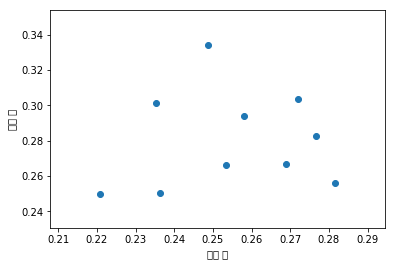

In [23]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [24]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['diff']=abs(a['19_HIT_RATE']-a['predict'])
a

,19_HIT_RATE,predict,diff
T_ID,,,
HH,0.268802,0.266905,0.001897
HT,0.253373,0.266225,0.012852
KT,0.271973,0.303595,0.031622
LG,0.258156,0.293691,0.035535
LT,0.220877,0.250046,0.029168
NC,0.276773,0.282640,0.005866
OB,0.281690,0.256008,0.025683
SK,0.236301,0.250157,0.013855
SS,0.235217,0.301504,0.066288


In [26]:
#차이 합
a['diff'].sum()

0.3085206369477751